In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv("LTC_USD_1MIN.csv").iloc[::-1]

In [3]:
df

,Unix Timestamp,Date,Open,High,Low,Close,Volume
698547,1.544220e+12,07-12-2018 21.21,24.20,24.20,24.20,24.20,0.00000
698546,1.544220e+12,07-12-2018 21.22,24.20,24.20,24.20,24.20,0.00000
698545,1.544220e+12,07-12-2018 21.23,24.20,24.20,24.20,24.20,0.00000
698544,1.544220e+12,07-12-2018 21.24,24.20,24.20,24.20,24.20,0.00000
698543,1.544220e+12,07-12-2018 21.25,24.20,24.20,24.20,24.20,0.00000
...,...,...,...,...,...,...,...
4,1.589240e+12,11-05-2020 23.57,41.77,41.89,41.77,41.88,18.69000
3,1.589240e+12,11-05-2020 23.58,41.88,41.88,41.88,41.88,0.00000
2,1.589240e+12,11-05-2020 23.59,41.88,41.88,41.70,41.70,2.31472
1,1.589240e+12,12-05-2020 0.00,41.70,41.70,41.70,41.70,0.00000


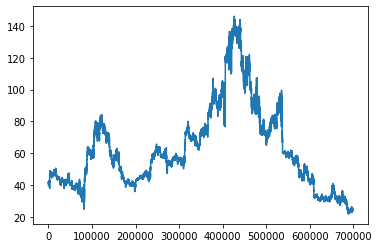

In [4]:
plt.plot(df["Close"])

In [5]:
yvals=np.array(df["Close"])
xvals=np.arange(0,yvals.shape[0])

In [6]:
coins=50
cash=10000

In [7]:
preds=[]
preds.append(yvals[0])
preds.append(yvals[1])
preds.append(yvals[2])
preds.append(yvals[3])

In [ ]:
import warnings

warnings.filterwarnings("ignore")

for i in np.arange(3,np.array(df["Close"]).shape[0],1):
    x_pairs=[]
    y_pairs=[]
    
    x_pairs.append(xvals[i-3])
    x_pairs.append(xvals[i-2])
    x_pairs.append(xvals[i-1])
    x_pairs.append(xvals[i])
    
    y_pairs.append(yvals[i-3])
    y_pairs.append(yvals[i-2])
    y_pairs.append(yvals[i-1])
    y_pairs.append(xvals[i])
    
    x_pairs=np.array(x_pairs).reshape(-1,1)
    y_pairs=np.array(y_pairs).reshape(-1,1)
    
    if i<np.array(df["Close"]).shape[0]-1:
        
        regression = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
        
        regression.fit(x_pairs, y_pairs)
        
        pred=regression.predict(np.array([xvals[i+1]]).reshape(-1,1))
        
        preds.append(pred)
        
        if pred-yvals[i]>0:
            
            if coins==50:
                
                pass
            
            else:
                
                coins=50
                cash=cash-(50*yvals[i])
        
        else:
            
            if coins==50:
                
                coins=0
                cash=cash+(50*yvals[i])
                
            else:
                
                pass
                
    else:
        
        pass